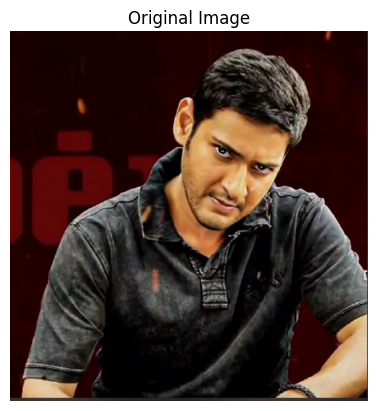

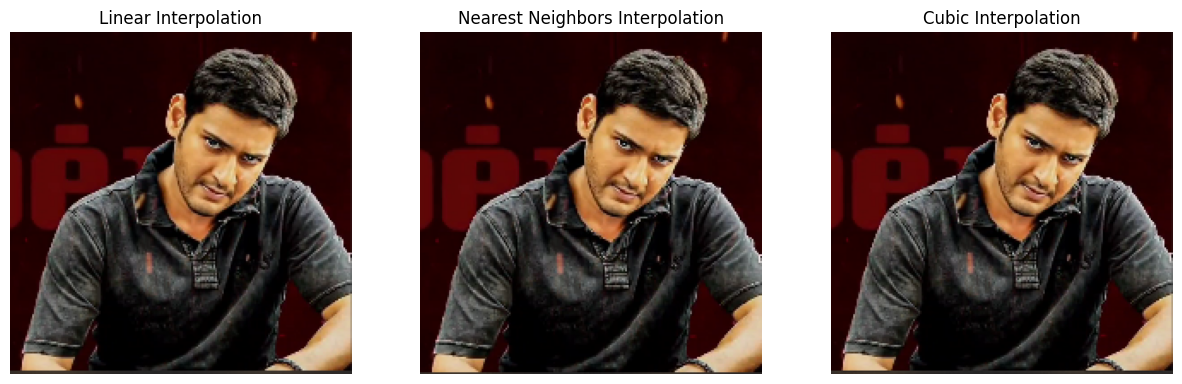

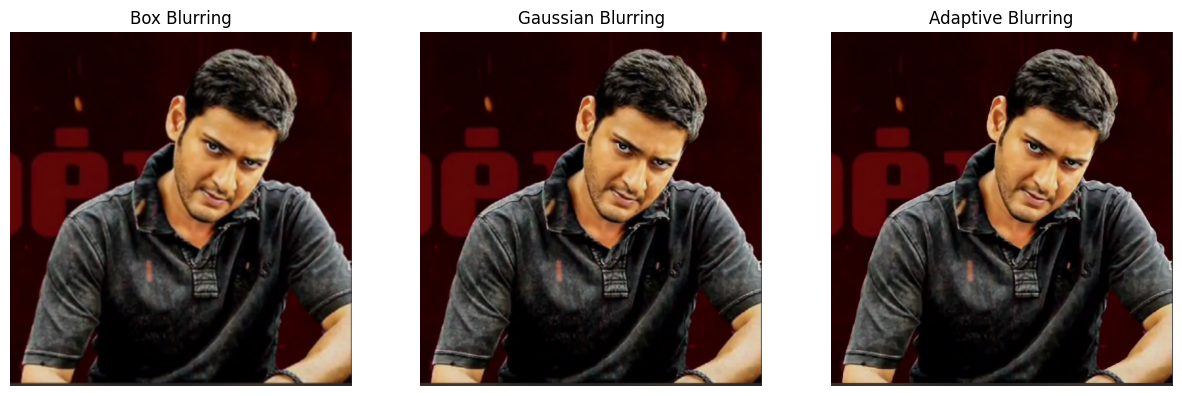

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "/content/Screenshot 2025-02-04 112416.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Display the original image
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Resize the image with different interpolation methods
resize_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resize_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resize_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Plot Resizing Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(resize_linear)
axes[0].axis('off')
axes[0].set_title("Linear Interpolation")

axes[1].imshow(resize_nearest)
axes[1].axis('off')
axes[1].set_title("Nearest Neighbors Interpolation")

axes[2].imshow(resize_cubic)
axes[2].axis('off')
axes[2].set_title("Cubic Interpolation")
plt.show()

# Apply blurring techniques
box_blur = cv2.blur(image, (5, 5))  # Box blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian blur
adaptive_blur = cv2.medianBlur(image, 5)  # Adaptive median blur

# Plot Blurring Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(box_blur)
axes[0].axis('off')
axes[0].set_title("Box Blurring")

axes[1].imshow(gaussian_blur)
axes[1].axis('off')
axes[1].set_title("Gaussian Blurring")

axes[2].imshow(adaptive_blur)
axes[2].axis('off')
axes[2].set_title("Adaptive Blurring")
plt.show()


**TASK_2**

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Perform k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred = model.predict(X_val_fold)

    # Calculate and store metrics
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_val_fold, y_pred))

# Print average metrics across all folds
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-Score:", np.mean(f1_scores))
# ... (Print other metrics like confusion matrix as needed)

Average Accuracy: 0.5507857142857142
Average Precision: 0.6697612870723468
Average Recall: 0.5507857142857142
Average F1-Score: 0.5041570048424828
